
# Tutorial 4 - Calculating Significance by Monte Carlo

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).

##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set homework_01_2d-datafile.csv?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?


In [3]:
#Tutorial # 04
## Calculating Significance by Monte Carlo
##
## More complete directions for this tutorial are in tut4.pdf
##

#1) Calculate two vectors (X and Y) of random normally distributed numbers 
#   with variance 1 and mean zero.  Each vector should be 1000 elements long 
#   as was the data in the homework.  Calculate $r_{xy}$ for these.
import numpy as np
from scipy.stats import pearsonr

def rxy_coef(x,y):
    mean_x = x.mean()
    mean_y = y.mean()
    var_x = np.var(x)
    var_y = np.var(y)
    rxy = np.sum((x-mean_x)*(y-mean_y))/(len(x) * np.sqrt(var_x*var_y))
    return rxy
X = np.random.normal(0,1,size=1000)
Y = np.random.normal(0,1,size=1000)
rxy= rxy_coef(X,Y)
print('Pearson coeff : ',rxy)
#rxy2 = pearsonr(X,Y)
#print(rxy2)


Pearson coeff :  0.02055418232524001
(0.020554182325240013, 0.5161858727539801)


In [6]:
#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.
rxy_dist = np.empty(1000)
for i in range(1000) : 
    X = np.random.normal(0,1,size=1000)
    Y = np.random.normal(0,1,size=1000)
    rxy_dist[i]= rxy_coef(X,Y)
print('The distribution of Pearson coeff is : ',rxy_dist)


The distribution of Pearson coeff is :  [ 2.35846669e-02 -2.33290247e-02 -4.45970438e-02 -2.46014485e-02
  3.87820256e-02  1.17665047e-02  2.14164237e-02  1.02696519e-01
 -3.18749887e-02 -3.51466144e-02 -4.03312302e-02 -1.54696459e-02
  3.70396194e-03 -6.11557104e-02  5.15048726e-02 -8.41229929e-02
 -1.24589144e-02  5.87831353e-02 -2.75623737e-02 -2.63288412e-02
 -1.26552941e-02  1.32728889e-02  3.32548275e-02  8.71953861e-02
 -2.36134561e-02  1.32277397e-02 -7.09644516e-02 -3.93072287e-03
 -2.53885767e-02  6.33454407e-02 -1.21058701e-02 -2.06529257e-02
 -1.40273784e-02 -2.13994944e-02  4.32224880e-02 -4.89030415e-02
 -1.05556063e-03 -6.96524097e-02  4.36430630e-03  2.38154313e-03
  5.14704515e-02 -1.19209627e-02  4.33335540e-03 -4.39181838e-02
 -2.32174281e-02  3.41327676e-02 -2.25006141e-02 -2.47072254e-02
  3.91635220e-02 -1.90901211e-04 -2.24765742e-03  4.26745961e-02
 -4.67780623e-02  1.05655533e-02  2.44484003e-02 -3.16774454e-02
  1.31782216e-02  1.66297113e-02 -4.74184932e-02 -

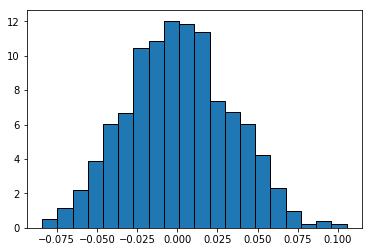

In [8]:
#3) Plot a histogram of your  $r_{xy}$ values.
import matplotlib.pyplot as plt
_=plt.hist(rxy_dist, bins=20, edgecolor='black', normed=True)
plt.show()

In [22]:
#4) What is the fraction of times $|r_{xy}|$ is larger than your measured value 
#   for homework\_01\_2d-datafile.csv ?  Would you expect to find this if there 
#   were no correlation?
f1 = float((np.sum(abs(rxy_dist)> 0.025))/len(rxy_dist))
print('The fraction of times rxy values are larger than 0.025 is : ', f1)
f2 = float((np.sum(abs(rxy_dist)> 0.05))/len(rxy_dist))
print('The fraction of times rxy values are larger than 0.05 is : ', f2)
f3 = float((np.sum(abs(rxy_dist)> 0.08))/len(rxy_dist))
print('The fraction of times rxy values are larger than 0.08 is : ', f3)
import pandas as pd
firstfile='homework_01_2d-datafile.csv'
hw_data=pd.read_csv(firstfile)
hw_x = hw_data['X']
hw_y = hw_data['Y']
hw_rxy = rxy_coef(hw_x,hw_y)
print('Pearson coef of Homework data is : ', hw_rxy)
print('P.S: It is a high value which we would not get if X and Y were not correlated')

The fraction of times rxy values are larger than 0.025 is :  0.45
The fraction of times rxy values are larger than 0.05 is :  0.131
The fraction of times rxy values are larger than 0.08 is :  0.009
Pearson coef of Homework data is :  0.9494460267240366
P.S: It is a high value which we would not get if X and Y were not correlated


Now we will the exersize using the homework data
The fraction of times rxy values are larger than 0.025 is :  0.422
The fraction of times rxy values are larger than 0.05 is :  0.12
The fraction of times rxy values are larger than 0.08 is :  0.01
Probabilities are almost the same


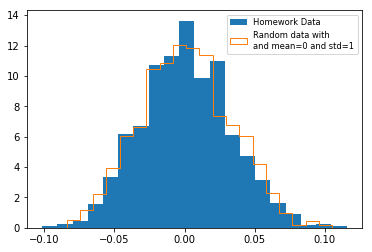

In [30]:
#5) Do the exersize over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ 
#   and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y 
#   variables.  Does this make any difference?
print('Now we will the exersize using the homework data')
hw_mean_x = np.mean(hw_x)
hw_mean_y = np.mean(hw_y)
hw_std_x = np.sqrt(np.var(hw_x))
hw_std_y = np.sqrt(np.var(hw_y))
hw_rxy_dist = np.empty(1000)
for i in range(1000) :
    X = np.random.normal(hw_mean_x, hw_std_x, size=1000)
    Y = np.random.normal(hw_mean_y, hw_std_y, size=1000)
    hw_rxy_dist[i]= rxy_coef(X,Y)
f1 = float((np.sum(abs(hw_rxy_dist)> 0.025))/len(rxy_dist))
print('The fraction of times rxy values are larger than 0.025 is : ', f1)
f2 = float((np.sum(abs(hw_rxy_dist)> 0.05))/len(rxy_dist))
print('The fraction of times rxy values are larger than 0.05 is : ', f2)
f3 = float((np.sum(abs(hw_rxy_dist)> 0.08))/len(rxy_dist))
print('The fraction of times rxy values are larger than 0.08 is : ', f3)
print('Probabilities are almost the same')
_= plt.hist(hw_rxy_dist, bins=20, normed=True, label='Homework Data')
_= plt.hist(rxy_dist, bins=20, normed=True, histtype = 'step', label='Random data with\nand mean=0 and std=1')
plt.legend(loc='upper right',fontsize='small')
plt.show()
    

In [32]:
#6) Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th 
#   value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability 
#   distribution is larger than it.  For example the 95\% upper bound would be 
#   at i/N = 0.95.  What is the 95% upper bound on $r_{xy}$ if there is not 
#   correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
#   In lecture we will find that the variance in this estimator is
#
#   Var[r_p] = \frac{ 2 p (1-p) }{N f(r_p)^2 }
#
#   for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
#   Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one 
#   you measure, what is the variance in your estimate of $r_{0.95}$?
rxy_dist_sorted = np.sort(rxy_dist)
rxy_95 = rxy_dist_sorted[int(0.95*len(rxy_dist))]
print('Our 95% upper bound is : ',rxy_95)
rxy_dist_mean = np.mean(rxy_dist)
rxy_dist_std = np.sqrt(np.var(rxy_dist))
import scipy.stats as stat
f = stat.norm.pdf(rxy_95, loc=rxy_dist_mean, scale=rxy_dist_std)
var_r95 = 2*0.95*(1-0.95)/(len(rxy_dist)*f**2)
print('The variance we get from this is : ', var_r95)

Our 95% upper bound is :  0.055919053769860214
The variance we get from this is :  1.0766613565472137e-05


The Spearman coeff is :  -0.005812517812517813
The Kendall coeff is :  -0.003831831831831832
Now we will do the same for a 1000 samples
Now we will plot the results


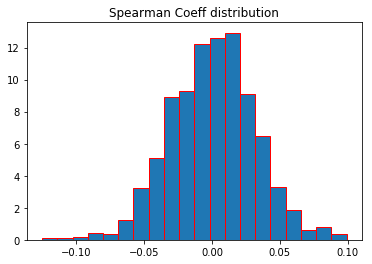

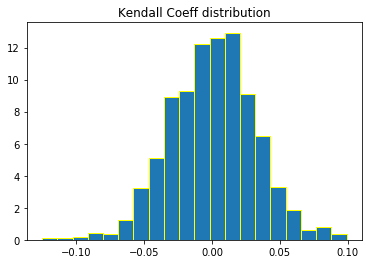

We can easily notice that both distributions are centered in 0 we have NO correlation


In [35]:
#7) Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  
#   There are Python functions for calculating them efficiently.  
#   These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ 
#   (in this case Gaussian) and are thus more widely applicable.  
#   Do they indicate that the data in the home work is correlated?
from scipy.stats import spearmanr
from scipy.stats import kendalltau
#1)
X=np.random.normal(0,1,size=1000)
Y=np.random.normal(0,1,size=1000)
sxy=spearmanr(X,Y)[0]
kxy=kendalltau(X,Y)[0]
print('The Spearman coeff is : ',sxy)
print('The Kendall coeff is : ',kxy)
#2)
print('Now we will do the same for a 1000 samples')
sxy_dist = np.empty(1000)
kxy_dist = np.empty(1000)
for i in range(1000) : 
    X = np.random.normal(0,1,size=1000)
    Y = np.random.normal(0,1,size=1000)
    sxy_dist[i]= spearmanr(X,Y)[0]
    kxy_dist[i]= kendalltau(X,Y)[0]
#3)
print('Now we will plot the results')
_=plt.hist(sxy_dist, bins=20, edgecolor='red', normed=True)
plt.title('Spearman Coeff distribution')
plt.show()
_=plt.hist(sxy_dist, bins=20, edgecolor='yellow', normed=True)
plt.title('Kendall Coeff distribution')
plt.show()
print('We can easily notice that both distributions are centered in 0 we have NO correlation')